## 3.6.5 Cancer Diagnostics
In this notebook I will try to predict whether or not an inividual will be diagnosed with breast cancer based on traits of the cancer cells

In [155]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [156]:
data = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\3.6.5 data\breast-cancer-wisconsin.txt', header = None)

In [157]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [158]:
#we dont need the id number
data = data.drop(0, axis=1)

In [159]:
#lets rename the columns to more easily identify them
data.columns = ['Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
              'Single_Epithelial_CellSize', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 
              'Mitoses', 'Class']

In [160]:
#the meta data told us some values contain a ? instead of values so lets find them
data.dtypes

Clump_Thickness                int64
Uniformity_Cell_Size           int64
Uniformity_Cell_Shape          int64
Marginal_Adhesion              int64
Single_Epithelial_CellSize     int64
Bare_Nuclei                   object
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [161]:
#and get rid of them
data = data.loc[data['Bare_Nuclei'] != '?']
data.head()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [162]:
#first thing is first, the dependent variable is category 10 (2 for benign, 4 for malignant)
#lets change it to boolean
data['Class'] = np.where(data['Class'] >= 3, 1, 0)

In [163]:
#now we need to change the category with ? into ints since we got rid of them and then look at the data again
data['Bare_Nuclei'] = data['Bare_Nuclei'].astype('int64')
data.describe()

,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_CellSize,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477297
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


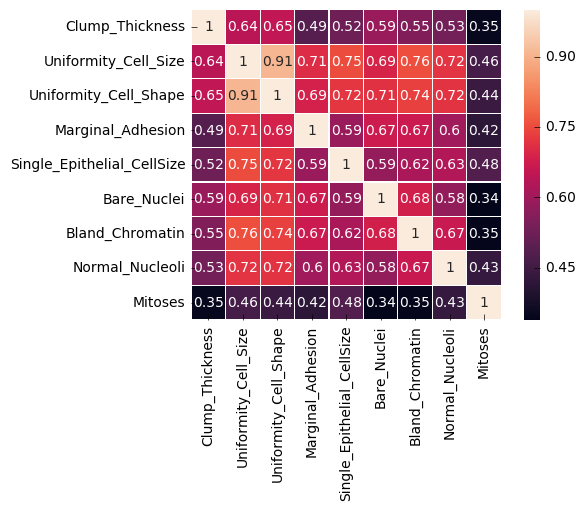

In [164]:
#lets take a look at correlations since all the data seems to be straight forward now
sns.heatmap(data.drop('Class',1).corr(), annot=True, linewidths=.1, square=True)

In [165]:
#cell size and shape are so highly correlated and have almost identical values from the describe function so lets take the average 
#and call it cell uniformity
data['Cell_Uniformity'] = (data['Uniformity_Cell_Size']+data['Uniformity_Cell_Shape'])/2
data = data.drop(['Uniformity_Cell_Size', 'Uniformity_Cell_Shape'], axis=1)

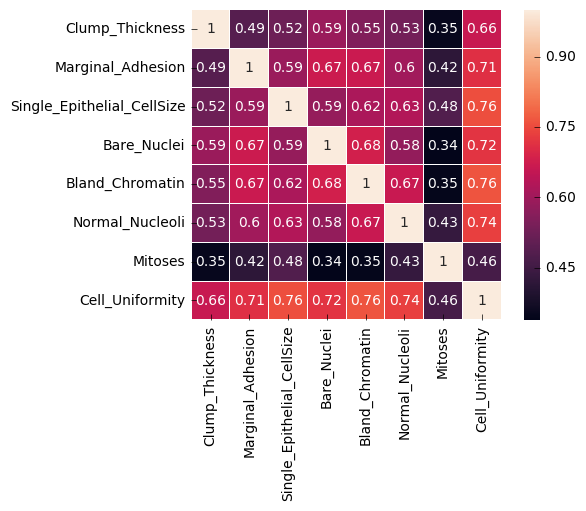

In [166]:
sns.heatmap(data.drop('Class',1).corr(), annot=True, linewidths=.1, square=True)

In [167]:
X= data.drop('Class',1)
y= data['Class']
rfc = ensemble.RandomForestClassifier(random_state=0)
cross_val_score(rfc, X, y, cv=10).mean()

0.96649489127253752

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [169]:
fit = rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)
crosstab = pd.crosstab(pred_y, y_test)
print('Actual on top and predicted on left')
print(crosstab)
print('accurately predicted benign tumour')
print(crosstab.iloc[0,0]/(crosstab.iloc[0,0]+crosstab.iloc[1,0]))
print('accurately predicted dangerous tumour')
print(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
print('Percentage accuracy')
print(rfc.score(X_test, y_test))
rfc.feature_importances_

Actual on top and predicted on left
Class    0   1
row_0         
0      103   6
1        4  58
accurately predicted benign tumour
0.96261682243
accurately predicted dangerous tumour
0.90625
Percentage accuracy
0.941520467836


array([ 0.06244028,  0.01296578,  0.08459794,  0.27790211,  0.04392672,
        0.09349803,  0.00246571,  0.42220343])

In [170]:
n_estimators = [10,20,30,40,50,75,100,200,500]
benign = []
dangerous = []
score = []
for x in n_estimators:
    rfc = ensemble.RandomForestClassifier(n_estimators=x, random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)
    fit = rfc.fit(X_train, y_train)
    pred_y = rfc.predict(X_test)
    crosstab = pd.crosstab(pred_y, y_test)
    benign.append(crosstab.iloc[0,0]/(crosstab.iloc[0,0]+crosstab.iloc[1,0]))
    dangerous.append(crosstab.iloc[1,1]/(crosstab.iloc[1,1]+crosstab.iloc[0,1]))
    score.append(cross_val_score(rfc, X_test, y_test, cv=10).mean())
    print(rfc.feature_importances_)
comp = pd.DataFrame()
comp['benign'] = benign
comp['dangerous'] = dangerous
comp['score'] = score
comp.index = n_estimators
comp

[ 0.06244028  0.01296578  0.08459794  0.27790211  0.04392672  0.09349803
  0.00246571  0.42220343]
[ 0.04886771  0.01182534  0.19860193  0.20309384  0.10526844  0.06560577
  0.00750662  0.35923036]
[ 0.05628464  0.0305208   0.2132218   0.19028649  0.08170411  0.07169871
  0.00967518  0.34660827]
[ 0.06434388  0.02809831  0.25229487  0.17253736  0.08537894  0.06558199
  0.00981131  0.32195332]
[ 0.06061736  0.03595704  0.22020132  0.17603917  0.07723287  0.08235522
  0.01023567  0.33736135]
[ 0.06793524  0.04816969  0.2468097   0.15443167  0.1000799   0.08781032
  0.00892853  0.28583496]
[ 0.0826286   0.04988784  0.23351056  0.15368531  0.09022543  0.09702446
  0.00837383  0.28466397]
[ 0.06757516  0.04819016  0.19700191  0.18111231  0.11644664  0.10831894
  0.00694314  0.27441174]
[ 0.07139948  0.05499867  0.16596331  0.17984271  0.11977959  0.10990222
  0.00659491  0.29151911]


,benign,dangerous,score
10,0.962617,0.906250,0.941054
20,0.962617,0.906250,0.945915
30,0.962617,0.906250,0.945915
40,0.962617,0.921875,0.945915
50,0.962617,0.937500,0.945915
75,0.962617,0.937500,0.952165
100,0.962617,0.937500,0.952165
200,0.962617,0.937500,0.952165
500,0.962617,0.937500,0.952165


In [171]:
rfc = ensemble.RandomForestClassifier(n_estimators=50, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)
fit = rfc.fit(X_train, y_train)
pred_y = rfc.predict(X_test)
crosstab = pd.crosstab(pred_y, y_test)
rfc.feature_importances_

array([ 0.06061736,  0.03595704,  0.22020132,  0.17603917,  0.07723287,
        0.08235522,  0.01023567,  0.33736135])

This model accurately predicts tumors potential existance with roughly a 95% accuracy rating across all trials. While this is pretty good in terms of standard testing, it is really bad in reality. When conducting tests on cancer prediction, you want success rates much much higher than 99%. This might not be possible with the size of this set, or with todays technology, but detection can mean life or death. This model also predicts people without cancer more accurately which also hurts the model as a whole since it is not the variable to focus on in this instance.

In terms of feature importance, The created cell uniformity was the most important in predicting correctly, while single epithetal size and bare nuclei came in second.